# <font style="color: rgb(50, 120, 229)"> Regresión Lineal en Keras </font>

En este cuaderno vamos a implementar dos modelos de regresión lineal en Keras.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

<font style="color: rgb(50, 120, 229)"> **Definir los parámetros** </font>

Durante el curso vamos a configurar muchos parámetros para los modelos de aprendizaje automático.

Para facilitar la configuración de los modelos, vamos a definir en la siguiente celda los parámetros que vamos a utilizar en este cuaderno.

In [2]:
EPOCHS = 50
DATA_PATH = "./data/regression_data.npy"
INPUT_SHAPE = (1, )

En la celda anterior definimos dos clases:

- **DatasetConfig**: Contiene los parámetros relacionados con el dataset, como el número de clases, la ruta del dataset, el tamaño de los datos de entrada, etc.
- **TrainConfig**: Contiene los parámetros relacionados con el entrenamiento, como el tamaño del batch, el número de épocas, el tamaño del conjunto de validación, etc.

Se entenderá el propósito de cada parámetro a medida que avancemos en el curso.

## <font style="color: rgb(50, 120, 229)"> Cargar el conjunto de datos </font>

Los datos datos que vamos a utilizar se generaron utilizando TensorFlow y fueron guardados en un archivo NumPy.

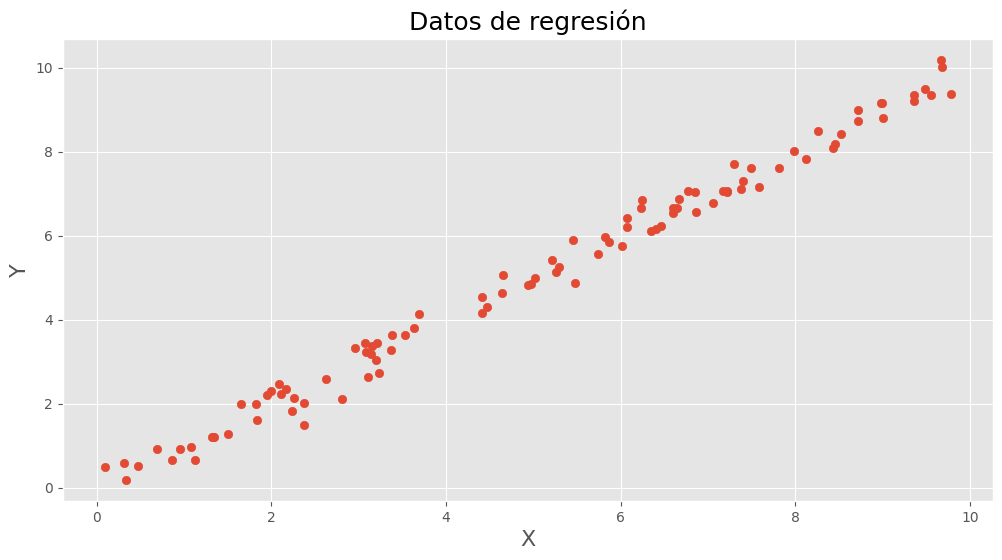

In [3]:
data = np.load(DATA_PATH)

X = data[:, 0]
Y = data[:, 1]

#Graficar los datos
plt.scatter(X, Y)
plt.title("Datos de regresión")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## <font style="color: rgb(50, 120, 229)"> Modelo 1: Regresión Lineal sin bias </font>

### <font style="color: rgb(50, 120, 229)"> 1.1 Entendiendo el modelo matemático </font>

Crearemos un modelo lineal simple con un parámetro (la pendiente) para modelar una línea recta que pase por el origen.

**El objetivo es predecir $y$ dada algún valor de $x$.**

Para hacer esto, ajustaremos una línea que pase por los puntos de datos $(x_i, y_i)$. La ecuación para tal línea es:

$$
y = mx + b
$$

Tenemos un conjunto de puntos de datos $(x_i, y_i)$, y todos deberían satisfacer la ecuación anterior. Por lo tanto,

$$
y_i = m x_i + b
$$

El modelo tiene dos parámetros: $m$ y $b$. Nuestro objetivo es encontrar los valores de $m$ y $b$ que minimicen el error cuadrático medio (MSE) entre las predicciones del modelo y los valores reales de $y$.


### <font style="color: rgb(50, 120, 229)"> 1.2 Implementación en Keras </font>

Restringimos el modelo a una línea recta que pasa por el origen.

El diagrama de red a continuación representa la red neuronal más simple posible.

<center>
    <img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/linear_regression_wx_b.webp?raw=1" width=800>
</center>

- Tiene una capa de entrada que consiste en una única característica. Técnicamente, la capa de entrada no se cuenta como una capa ya que no hay parámetros entrenables asociados con ella.

- La red tiene solo una capa que consiste en una solo neurona. **La capa única ES la capa de salida.**

- La neurona tiene una función de activación lineal que simplemente multiplica la característica de entrada $x$ por el peso $w$ y suma el sesgo $b$.

- Para cada muestra de entrenamiento, la salida predicha $y'$ se compara con el valor real de los datos de entrenamiento, y se calcula la pérdida. Esto nos permite calcular el gradiente con respecto a $w$ y actualizar el peso (pendiente) según una tasa de aprendizaje de entrada.

Todos estos detalles son manejados por Keras una vez que definimos el modelo de red y llamamos a una función para entrenar la red.


### <font style="color: rgb(50, 120, 229)"> 1.3 Entendiendo el flujo de trabajo </font>

Los siguientes pasos resumen el flujo de trabajo en Keras:

1. Construir/Definir un modelo de red utilizando ya sea la API Secuencial o la API Funcional en Keras.
2. Compilar el modelo con `model.compile()`
3. Entrenar el modelo con `model.fit()`
4. Predecir la salida `model.predict()`


<center>
    <img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/keras_workflow_basic.webp?raw=1" width=800>
</center>

#### <font style="color: rgb(50, 120, 229)"> **Creamos el modelo de regresión lineal en Keras.** </font>

In [5]:
#TODO: Crea un modelo sequencial de Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [6]:
#TODO: Agrega una capa de entrada con el número de dimensiones correcto
model.add(Dense(1, input_shape=INPUT_SHAPE))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#TODO: Agrega una capa densa con una sola neurona y la función de activación debe ser lineal (None)
model.add(Dense(1, activation=None))

In [8]:
#TODO: Imprime un resumen del modelo (summary)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

#### <font style="color: rgb(50, 120, 229)"> **Compilamos el modelo.** </font>

Compilar el modelo requiere que especifiques el tipo de función de pérdida (en este caso, el error cuadrático medio: 'mse') y también especificar el tipo específico de optimizador a utilizar.


In [9]:
#TODO: Compila el modelo con el optimizador SGD (sgd) y la función de pérdida de error cuadrático medio (mse)
model.compile(optimizer='sgd', loss='mse')

#Ambos valores se pasan como cadenas de texto


#### <font style="color: rgb(50, 120, 229)"> **Entrenamos el modelo.** </font>

Una vez que el modelo está compilado, podemos llamar al método `fit` para entrenar el modelo.

Los argumentos requeridos incluyen los datos de entrenamiento y el número de épocas para entrenar.

El método `fit` devuelve un objeto `history` que podemos usar para acceder a la pérdida de cada época.


In [10]:
#TODO: Entrena el modelo con los datos de entrada y salida por 50 épocas. Guarda el historial del entrenamiento en la variable history
history = model.fit(X, Y, epochs=EPOCHS)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 22.1620
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0874  
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0840 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0882 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - loss: 0.0854
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2579 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - loss: 0.1012
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0906
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1039 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0793 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0750  
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2654
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0795  
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1430 
Epoch 16/50
4/4 ━━━━━━━━

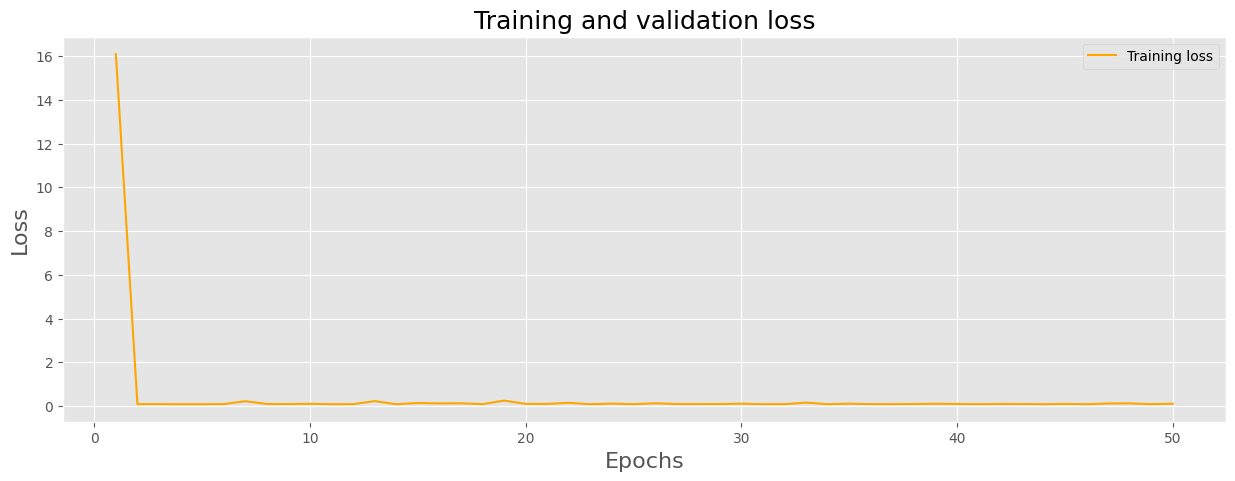

In [11]:
#Graficar el error cuadrático medio
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### <font style="color: rgb(50, 120, 229)"> **Hacemos predicciones.** </font>

Después de que el modelo haya sido entrenado, podemos acceder a los parámetros entrenados directamente desde el objeto `model`.

In [12]:
slope = model.layers[0].weights[0]
print('Pendiente: ', slope[0].numpy())

Pendiente:  [1.2314988]


En la práctica no solemos acceder a los pesos directamente, sino que usamos el método `predict` para hacer predicciones en nuevos datos.

Este metodo toma un `tensor` de entrada y devuelve un tensor de salida.

In [13]:
pred_y = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


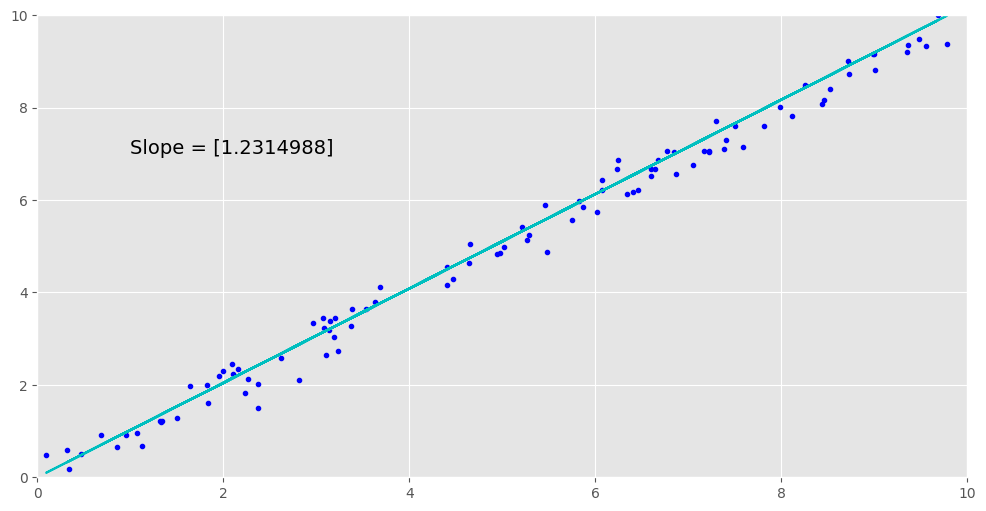

In [14]:
plt.plot(X, Y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## <font style="color: rgb(50, 120, 229)"> Preguntas de comprensión </font>

1. ¿Qué es la regresión lineal? La regresión lineal es un modelo estadístico que se utiliza para predecir el valor de una variable dependiente (salida) basándose en una o más variables independientes (entradas).
2. ¿Cuántas neuronas en su capa de salida tiene un modelo de regresión lineal simple? Un modelo de regresión lineal simple tiene una sola neurona en su capa de salida, ya que predice un único valor continuo.
3. ¿Qué función de activación se utiliza en la capa de salida de un modelo de regresión lineal? En un modelo de regresión lineal no se utiliza ninguna función de activación o se utiliza la función de activación lineal, que simplemente devuelve el valor de entrada sin cambios.
4. ¿En qué consiste la compilación de un modelo en Keras? La compilación de un modelo en Keras consiste en definir la función de pérdida, el optimizador y las métricas que se utilizarán para entrenar el modelo. Este paso prepara el modelo para el proceso de entrenamiento.
5. ¿Qué función de pérdida se utiliza comúnmente en un modelo de regresión lineal? La función de pérdida comúnmente utilizada en un modelo de regresión lineal es el error cuadrático medio (MSE, por sus siglas en inglés).
6. ¿Qué devuelve el método `fit` en Keras? El método fit en Keras devuelve un objeto de tipo History, que contiene información sobre el entrenamiento del modelo, como los valores de la pérdida y las métricas en cada época.